# Introduction

The Waveform Operation and Layering Framework (WOLF) is a small project meant to provide a framework and graphical user interface (GUI) for reading, modifying, playing, and saving various waveforms.

In [1]:
import numpy as np
from pydub import AudioSegment

# Define / read in audio file
audio_file = "..//samples//piano_oneshot.mp3"
song = AudioSegment.from_mp3(audio_file)

### Determine track characteristics

Track characteristics include identifying track duration, individual channel definition, and identifing the sample quality.

In [24]:
# Calculate duration
duration = song.duration_seconds
samprate = song.frame_rate
sampwdth = song.frame_width

# Split to left and right channels
split_channels = song.split_to_mono()
indiv_channels = [s.get_array_of_samples() for s in split_channels]
fp_arr = np.array(indiv_channels).T.astype(np.float32)
fp_arr /= np.iinfo(indiv_channels[0].typecode).max  # Shape: (464256,2)

# Identify total samples and time axis
n_samples = fp_arr.shape[0]
time_axis = np.linspace(0, duration, num=n_samples)

### Visualization sanity check

Before WOLF gets too far, visualizations will be used as a guiding light for sanity checking application of filters and other sporadic functions.

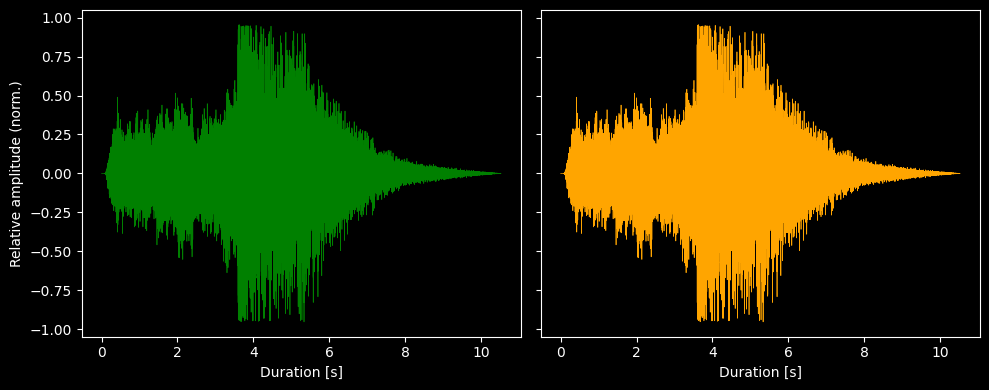

In [3]:
import matplotlib.pyplot as plt

# Always use a dark background for appearance
plt.style.use("dark_background")

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
# Left mono signal
ax1.plot(time_axis, fp_arr[:, 0], color="green", linewidth=0.5)
ax1.set_xlabel("Duration [s]")
# Right mono signal
ax2.plot(time_axis, fp_arr[:, 0], color="orange", linewidth=0.5)
ax2.set_xlabel("Duration [s]")
ax1.set_ylabel("Relative amplitude (norm.)")
plt.tight_layout()
plt.show()

### Applying basic filters

To begin, basic high- and low-pass filters are applied. Samples can also be reversed, stretched, or randomized. This is meant as a precursor to more complex functions with real-time feedback mechanisms that modify then play back the final track.

In [28]:
import pygame
from pydub import AudioSegment
from pydub.playback import play

# First, recombine signals to form a closed loop (open > split > combine > play)
left_channel = indiv_channels[0]
right_channel = indiv_channels[1]
channel1 = left_channel

audio_segment1 = AudioSegment(
    left_channel.tobytes(), frame_rate=samprate, sample_width=sampwdth, channels=1
)
audio_segment2 = AudioSegment(
    right_channel.tobytes(), frame_rate=samprate, sample_width=sampwdth, channels=1
)
# print(type(audio_segment))
# stereo_sound = AudioSegment.from_mono_audiosegments(left_channel, right_channel)
stereo_sound = AudioSegment.from_mono_audiosegments(audio_segment1, audio_segment2)
# print(type(indiv_channels[0]))
# print(type(stereo_sound))
# play(song)
play(stereo_sound)

# played_togther = left_channel.overlay(right_channel)
# pydub.playback(stereo_sound)
## Initialize pygame
# pygame.mixer.init()
##pygame.mixer.music.load(channel_1)
# pygame.mixer.music.play(channel_1)

#### Other ideas
- Playing two tracks at once, one in each channel
- Blending two tracks based on one track's detected beat